In [1]:
# -*- coding: utf-8 -*-
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from lxml import objectify
from pandas import DataFrame
from datetime import datetime, date, time
from dateutil.parser import parse
import pandas as pd
import numpy as np
import sklearn as sk
import time
import sys
from sklearn import metrics
import re
from numpy.random import seed
import nltk.stem

In [2]:
from IPython.display import display, HTML
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

In [3]:


ru_stemmer = nltk.stem.SnowballStemmer('russian')

In [4]:

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([ru_stemmer.stem(w) for w in analyzer(doc)])

#vectorizerContent = StemmedCountVectorizer(min_df=1, analyzer="word", stop_words=stop_words)

In [6]:
data_start=pd.read_pickle('data/WikiData_dat_5.pkl')
data_start.head()

,id,title,autor,text,data,cat,text2,noun,text3,year
1349,1349,россия удивлена заявлениями премьер-министра у...,Krassotkin,{{:дата|3 ноября 2005}} {{украина}}в [[w:ru:мо...,3 ноября 2005,"россия, украина, политика, вто, юрий ехануров,...",украинав обратили внимание на сообщения о в...,"[россия, премьерминистр, украина, разъяснение,...","[россия, заявлениями, премьерминистра, украины...",2005-11-01
1353,1353,впервые зарегистрирован свет самых древних звезд,Krassotkin,{{дата|3 ноября 2005}}{{астрономия}}[[:w:спитц...,3 ноября 2005,"опубликовано, спитцер, nasa, вселенная, nature","астрономия, предположительно, зарегистрировал ...","[свет, звезда, астрономия, свет, звезда, звезд...","[зарегистрирован, свет, древних, звезд, астрон...",2005-11-01
1359,1359,день народного единства,Krassotkin,{{дата|4 ноября 2005}}в россии первый раз праз...,4 ноября 2005,"россия, день народного единства, праздники",в россии первый раз празднуют «день народного ...,"[день, год, год, войско, князь]","[день, единства, россии, раз, день, единства, ...",2005-11-01
1361,1361,беспорядки в париже,Krassotkin,{{дата|5 ноября 2005}} {{франция}}[[изображени...,5 ноября 2005,"франция, гражданские беспорядки, париж, страсб...","францияв , уже больше недели, продолжаются ма...","[беспорядок, беспорядок, молодая, человек, гор...","[беспорядки, париже, францияв, недели, массовы...",2005-11-01
1381,1381,парламентские выборы в азербайджане,Artem Korzhimanov,{{дата|6 ноября 2005}}{{азербайджан}}6 ноября ...,6 ноября 2005,политика,азербайджан6 ноября 2005 года в состоялись па...,"[азербайджан, ноябрь, выбор, данные, большинст...","[выборы, азербайджане, азербайджан, ноября, го...",2005-11-01


In [7]:
len(data_start)

10748

In [8]:
topic=[]
for row in data_start['cat'].tolist():
    if "спорт" in row:
        topic.append("sport")
    else:
        topic.append("other")
print (len(topic))
data_start['topic']=topic
#print (data_start.head(1))

10748


In [9]:
data_bi=data_start[['title', 'cat', 'text2', 'noun', 'topic']][:3000]
data_test=data_start[['title', 'cat', 'text2', 'noun', 'topic']][3000:4000]
d_sport = (data_bi['topic']==u'sport')
data=data_bi.loc[d_sport]


In [10]:
print (len(data), len(data_test))

117 1000


In [11]:
data.head()

,title,cat,text2,noun,topic
1502,последний тур чемпионата россии по футболу 2005,"чемпионат россии по футболу, фк спартак (москв...",футболсыгран последний тур в 2005 году. в пос...,"[чемпионат, россия, тур, клуб, количество, очк...",sport
1532,рейтинг футбольных сборных,"футбол, рейтинг фифа, опубликовано, сборная ис...",футболмеждународная федерация футбола опублико...,"[рейтинг, футбол, рейтинг, неудача, игра, мир,...",sport
1543,скончался джордж бест,"великобритания, футбол, некрологи, северная ир...",северная ирландиясегодня в клинике кромвеля в ...,"[бест, лондон, футболист, джордж, бестбест, го...",sport
1569,лучшим футболистом европы 2005 года назван рон...,"футбол, опубликовано, сборная бразилии по футб...",лучшим футболистом 2005 года назван форвард и...,"[европа, год, роналдиньо, опрос, журналист, га...",sport
1626,жеребьёвка предварительных групп чм 2006 по фу...,"футбол, мюнхен, дортмунд, ганновер, сборная яп...",футбол9 декабря в w|лейпциге будет проведена ...,"[жеребьёвка, декабрь, жеребьёвка, чемпионат, м...",sport


In [12]:
data_test['topic'].value_counts()

other    969
sport     31
Name: topic, dtype: int64

In [13]:
data_start['topic'].value_counts()

other    10549
sport      199
Name: topic, dtype: int64

In [14]:
data['topic'].value_counts()

sport    117
Name: topic, dtype: int64

In [15]:
dfTimeUniqCat=pd.unique(data.topic.ravel())
print (len(dfTimeUniqCat))
category = data['topic'].tolist()
category = [str(i) for i in category]
#category = list(map(str, category))
content = data['title'].tolist()
stop_words = ['и']
content  = [str(x) for x in content]
for x in category:
    if not isinstance(x, str):
        print (x)


1


In [16]:
%%time
vectorizerContent = StemmedCountVectorizer (min_df=1, stop_words=stop_words, lowercase=True, analyzer="word")
vectorizerCategory = CountVectorizer (min_df=1)

X = vectorizerContent.fit_transform(content)
Xcat = vectorizerCategory.fit_transform(category)
xx = X.toarray().transpose()
xxcat = Xcat.toarray().transpose()

selected_feature_names_Cont = np.asarray(vectorizerContent.get_feature_names())
selected_feature_names_Cat = np.asarray(vectorizerCategory.get_feature_names())


Wall time: 68.6 ms


In [17]:
class OcTm (object):
    def __init__(self,  eta=1.0):
        self.eta=eta
        
    def fit(self, X, y):
        i = 0
        self.Pwt = 0
        for xC in y:
            self.Pwt += np.array(xC.toarray())*np.array(X[i].toarray().transpose())
            i += 1
        i1 = 0
        self.Theta = np.arange(self.Pwt.size, dtype=float).reshape(self.Pwt.sum(axis=1).size, self.Pwt[0].size)
        for el4 in self.Pwt.sum(axis=1):
            i2 = 0
            for el1 in self.Pwt[i1]:
                self.Theta[i1][i2]=float(el1)/self.Pwt[i1].sum()
                i2 += 1
            i1 += 1
        return self
    
    def predict(self, query):
        predictMatrixW = []
        #cN=int(len(query.split(" "))/2)
        for w in query.split(" "):
            newWord = vectorizerContent.transform([w]).toarray()
            #v1=float(xxcat[1].sum())/(xxcat[1].sum()+xxcat[0].sum())
            #v0=float(xxcat[0].sum())/(xxcat[1].sum()+xxcat[0].sum())
            value_True=1.0-self.eta
            value_False=self.eta
            el_data= {}
            if newWord.sum()==0:
                #cN+=1
                el_data[selected_feature_names_Cat[0]] = value_True#*logn(e, cN)
                #print (selected_feature_names_Cat[0], v0)
                el_data['other'] = value_False#*logn(e, cN)
                #print ('other', v1)
                predictMatrixW.append(dict(el_data))
            else:
                j=0
                for inNew in np.nditer(newWord):
                    if inNew > 0:
                        #wordInDoc = float(xx[j].sum())
                        k = 0
                        for inCat in self.Pwt[j]:
                            if inCat > 0:
                                #wordInCat = float(xxcat[k].sum())
                                #*(1-wordInCat/countDoc)*(1-wordInDoc/countDoc)
                                cVal=self.Theta[j][k]#*(1-wordInCat/len(content))*(1-wordInDoc/len(content))
                                el_data[selected_feature_names_Cat[0]] = cVal
                                el_data['other'] = 1.0-cVal
                                predictMatrixW.append(dict(el_data))
                            k +=1
                    j+=1
        dfMW = DataFrame(predictMatrixW)
        dfSumMW=dfMW.sum()
        i =0
        dfSumMW.sort_values(ascending=False, kind='quicksort', na_position='last', inplace=True)
        for el in dfSumMW.T.iteritems():
            i += 1
            if i < 2:
                #return ("%s; %f" % (el[0], el[1]/dfSumMW.sum()))
                return (el[0], el[1]/dfSumMW.sum())



In [25]:
ot=OcTm(eta=0.99)
ot.fit(X, Xcat)

In [26]:
ot.predict ('рейтинг футбольных сборных')

('sport', 1.0)

In [27]:
%%time

i = 0
outputpredict = []
outputpredictVal=[]
executionTime=[]
for query in data_test['title']:
    start_time = time.time()
    out=ot.predict(query)
    end_time = time.time()
    execution_time = round(end_time - start_time, 5)
    outputpredict.append(out[0])
    outputpredictVal.append(out[1])
    i+=1
    executionTime.append(execution_time)
    if i%500==0:
        print (i, query, out[0], out[1], execution_time)

    

500 google обогнала microsoft и заняла второе место среди it-компаний по капитализации other 0.72 0.0045
1000 санта-клаус прибыл в голливуд (видео) other 0.99 0.0015
Wall time: 3.32 s


In [28]:
clean_test_reviews = []
for query in data_test['title']:
    clean_test_reviews.append(query)

In [29]:
output = pd.DataFrame( data={"title": clean_test_reviews, 'topic': outputpredict, 'val': outputpredictVal, 'time': executionTime} )
outClass=[]
try:
    outClass.append(output['topic'].value_counts()['other'])
except:
    outClass.append(0)
#print (output['topic'].value_counts()['other'])

In [30]:
output['topic'].value_counts()

other    902
sport     98
Name: topic, dtype: int64

accuracy:   0.903
[[887  82]
 [ 15  16]]


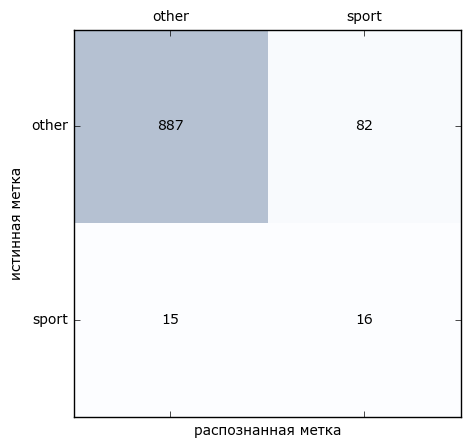

In [31]:
score = metrics.accuracy_score(data_test.topic.tolist(), outputpredict)
print("accuracy:   %0.3f" % score)

confmat=confusion_matrix(data_test.topic.tolist(), outputpredict)
print (confmat)
labels=['other', 'sport']
confmat=metrics.confusion_matrix(data_test.topic.tolist(), outputpredict, labels=labels)
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    #print (labels[i])
    for j in range(confmat.shape[1]):
        #print (labels[j])
        ax.text(x=j, y=i,
               s=confmat[i,j],
               va='center', ha='center')
plt.xticks(np.arange(0,2), labels)
plt.yticks(np.arange(0,2), labels)
plt.xlabel('распознанная метка')
plt.ylabel('истинная метка')
plt.savefig('data/OC-TM_t-f.png')
plt.show()